In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import sqlite3
import SQL_queris as w

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot ## For offline mode.
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt ##Again, visualizatoin.

colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]


In [2]:
conn = sqlite3.connect('Spotify_data.db')

In [3]:
spotify_DF = pd.read_sql_query(w.spotify_tracks_data_query, conn)

spotify_DF.head()

,index,Unnamed: 0,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,published_at,updated_at,category,nominee,artist,workers,img,winner,genres,popularity
0,388,388,STAR WALKIN' (League of Legends Worlds Anthem),Lil Nas X,1,2022,9,22,2616,0,...,2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Album Of The Year,7,Lil Nas X,"Joe Grasso, engineer/mixer; Montero Lamar Hill...",https://www.grammy.com/sites/com/files/styles/...,1,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",89
1,388,388,STAR WALKIN' (League of Legends Worlds Anthem),Lil Nas X,1,2022,9,22,2616,0,...,2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap/Sung Performance,Panini,Lil Nas X,None,https://www.grammy.com/sites/com/files/styles/...,1,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",89
2,519,519,MONTERO (Call Me By Your Name),Lil Nas X,1,2020,9,18,12329,0,...,2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Album Of The Year,7,Lil Nas X,"Joe Grasso, engineer/mixer; Montero Lamar Hill...",https://www.grammy.com/sites/com/files/styles/...,1,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",89
3,519,519,MONTERO (Call Me By Your Name),Lil Nas X,1,2020,9,18,12329,0,...,2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Rap/Sung Performance,Panini,Lil Nas X,None,https://www.grammy.com/sites/com/files/styles/...,1,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",89
4,524,524,THATS WHAT I WANT,Lil Nas X,1,2021,9,17,7963,0,...,2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Album Of The Year,7,Lil Nas X,"Joe Grasso, engineer/mixer; Montero Lamar Hill...",https://www.grammy.com/sites/com/files/styles/...,1,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",89


In [4]:
spotify_DF.columns

Index(['index', 'Unnamed: 0', 'track_name', 'artist(s)_name', 'artist_count',
       'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'index',
       'Unnamed: 0', 'year', 'title', 'published_at', 'updated_at', 'category',
       'nominee', 'artist', 'workers', 'img', 'winner', 'genres',
       'popularity'],
      dtype='object')

In [5]:
artist_counts = spotify_DF['artist(s)_name'].value_counts()
artist_counts

artist(s)_name
Taylor Swift          272
Kendrick Lamar         72
The Weeknd             66
Adele                  44
Eminem                 44
Ed Sheeran             36
Drake                  24
Bruno Mars             24
Billie Eilish          20
Bad Bunny              19
Coldplay               18
Kanye West             18
Lizzo                  15
Lady Gaga              12
Ariana Grande          10
Frank Sinatra           8
Metallica               7
Lil Nas X               6
Steve Lacy              6
Ghost                   6
The Police              5
Nirvana                 4
Paul McCartney          4
Childish Gambino        4
John Legend             4
Aerosmith               4
Mariah Carey            3
Lana Del Rey            3
Kelly Clarkson          3
Radiohead               3
Imagine Dragons         3
Tyler, The Creator      3
Shakira                 3
Maroon 5                2
Frank Ocean             2
Sam Smith               2
Burna Boy               2
Linkin Park            

In [6]:
iplot(px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value="Count"),
             title = 'Top 15 Artists with Most Songs'
            ))

In [7]:
print(f"Number of column :{spotify_DF.shape[1]}\nNumber of rows :{spotify_DF.shape[0]}")

Number of column :40
Number of rows :793


In [8]:
print(f"number of artists '{spotify_DF['artist(s)_name'].nunique()}'")

number of artists '45'


In [9]:
artist_counts.head(20)

artist(s)_name
Taylor Swift      272
Kendrick Lamar     72
The Weeknd         66
Adele              44
Eminem             44
Ed Sheeran         36
Drake              24
Bruno Mars         24
Billie Eilish      20
Bad Bunny          19
Coldplay           18
Kanye West         18
Lizzo              15
Lady Gaga          12
Ariana Grande      10
Frank Sinatra       8
Metallica           7
Lil Nas X           6
Steve Lacy          6
Ghost               6
Name: count, dtype: int64

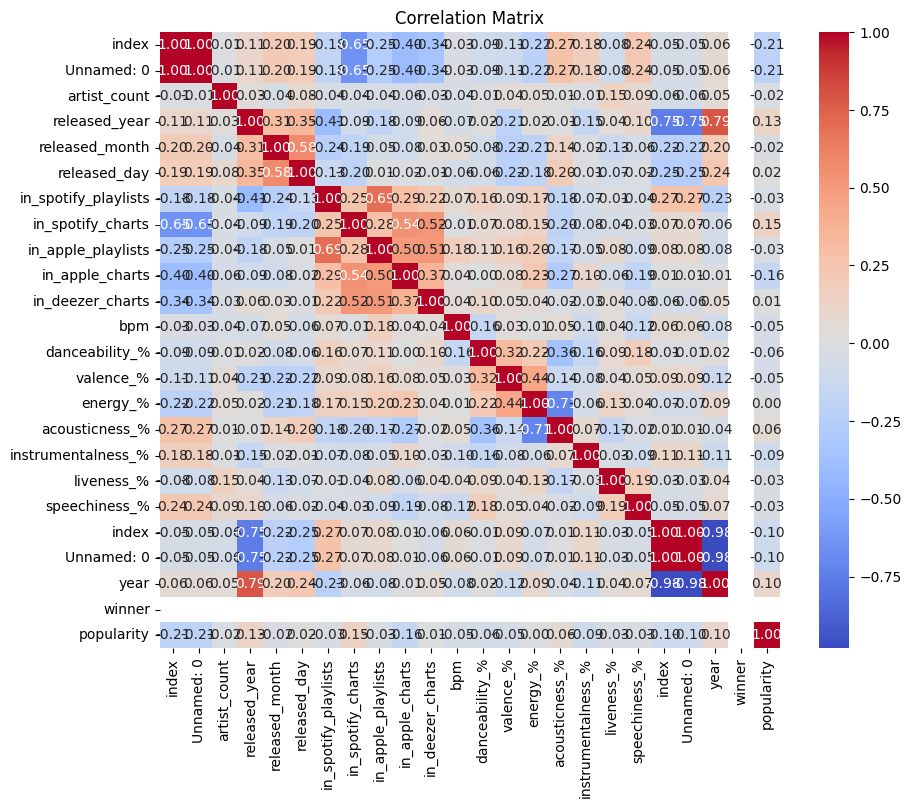

In [10]:
numeric_df = spotify_DF.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
songs_by_year = spotify_DF['released_year'].value_counts()
songs_by_year.columns = ['Year', 'count']
songs_by_year

released_year
2022    305
2023     73
2021     69
2014     35
2020     35
2010     31
2019     30
2017     29
2002     28
2012     22
2011     19
2000     19
2013     18
2008     12
2004     11
2016     11
1957      8
1986      7
1983      5
1979      4
1991      4
1973      4
1992      3
2018      3
2015      3
1994      3
1952      1
2003      1
Name: count, dtype: int64

<Axes: >

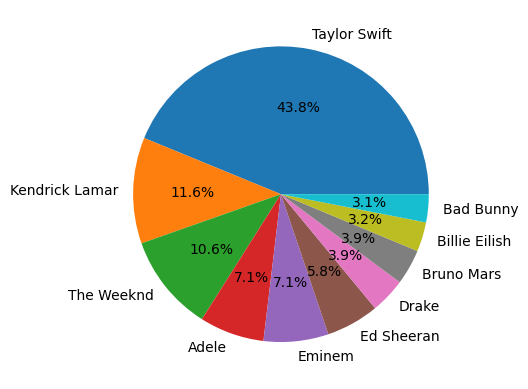

In [12]:
spotify_DF['artist(s)_name'].sort_values().value_counts().nlargest(10).plot(kind='pie',ylabel = "", autopct='%1.1f%%')